<a href="https://colab.research.google.com/github/AmaanAnsari123/AAA/blob/main/Black_Scholes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math

def black_scholes(option_type, S, K, T, r, sigma):
    """
    Calculate the option price using the Black-Scholes formula.

    :param option_type: 'call' for call option, 'put' for put option
    :param S: Current stock price
    :param K: Strike price
    :param T: Time to expiration (in years)
    :param r: Risk-free interest rate (annual)
    :param sigma: Volatility of the underlying stock (annual)
    :return: Option price
    """
    d1 = (math.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option_type == 'call':
        option_price = S * norm_cdf(d1) - K * math.exp(-r * T) * norm_cdf(d2)
    elif option_type == 'put':
        option_price = K * math.exp(-r * T) * norm_cdf(-d2) - S * norm_cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

def norm_cdf(x):
    """Calculate the cumulative distribution function of the standard normal distribution."""
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0

# Example usage:
option_type = 'call'  # 'call' for call option, 'put' for put option
S = 100  # Current stock price
K = 100  # Strike price
T = 1  # Time to expiration (in years)
r = 0.05  # Risk-free interest rate (annual)
sigma = 0.2  # Volatility of the underlying stock (annual)

option_price = black_scholes(option_type, S, K, T, r, sigma)
print(f"Theoretical {option_type} option price: {option_price:.2f}")


Theoretical call option price: 10.45


In [ ]:
import math
from scipy.stats import norm

def black_scholes(option_type, S, K, T, r, sigma):
    """
    Calculate the option price using the Black-Scholes formula.

    :param option_type: 'call' for call option, 'put' for put option
    :param S: Current stock price
    :param K: Strike price
    :param T: Time to expiration (in years)
    :param r: Risk-free interest rate (annual)
    :param sigma: Volatility of the underlying stock (annual)
    :return: Option price, Delta, Gamma, Theta, Vega, Rho
    """
    d1 = (math.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
        delta = norm.cdf(d1)
    elif option_type == 'put':
        option_price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        delta = -norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    # Calculate Greeks
    gamma = norm.pdf(d1) / (S * sigma * math.sqrt(T))
    theta = -(S * sigma * norm.pdf(d1)) / (2 * math.sqrt(T)) - r * K * math.exp(-r * T) * norm.cdf(d2)
    vega = S * math.sqrt(T) * norm.pdf(d1)
    rho = K * T * math.exp(-r * T) * norm.cdf(d2)

    return option_price, delta, gamma, theta, vega, rho

# Example usage:
option_type = 'call'  # 'call' for call option, 'put' for put option
S = 100  # Current stock price
K = 100  # Strike price
T = 1  # Time to expiration (in years)
r = 0.05  # Risk-free interest rate (annual)
sigma = 0.2  # Volatility of the underlying stock (annual)

option_price, delta, gamma, theta, vega, rho = black_scholes(option_type, S, K, T, r, sigma)
print(f"Theoretical {option_type} option price: {option_price:.2f}")
print(f"Delta: {delta:.4f}")
print(f"Gamma: {gamma:.4f}")
print(f"Theta: {theta:.4f}")
print(f"Vega: {vega:.4f}")
print(f"Rho: {rho:.4f}")


Theoretical call option price: 10.45
Delta: 0.6368
Gamma: 0.0188
Theta: -6.4140
Vega: 37.5240
Rho: 53.2325


In [ ]:
import math
from scipy.stats import norm

def black_scholes_put(S, K, T, r, sigma):
    """
    Calculate the value of a put option using the Black-Scholes formula.

    :param S: Current stock price
    :param K: Strike price
    :param T: Time to expiration (in years)
    :param r: Risk-free interest rate (annual)
    :param sigma: Volatility of the underlying stock (annual)
    :return: Put option price
    """
    d1 = (math.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    put_option_price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return put_option_price

# Example usage:
S = 100  # Current stock price
K = 100  # Strike price
T = 1  # Time to expiration (in years)
r = 0.05  # Risk-free interest rate (annual)
sigma = 0.2  # Volatility of the underlying stock (annual)

put_option_price = black_scholes_put(S, K, T, r, sigma)
print(f"Theoretical put option price: {put_option_price:.2f}")


Theoretical put option price: 5.57


[18.54686826785041, 18.289736746365325, 18.031609813119225, 17.772476297644285, 17.51232494616336, 17.251144420885293, 16.98892329929456, 16.725650073435105, 16.461313149188484, 16.195900845545946, 15.92940139387475, 15.661802937178681, 15.393093529352223, 15.123261134428848, 14.852293625823457, 14.580178785568116, 14.306904303542163, 14.032457776695718, 13.756826708266983, 13.479998506993224, 13.201960486315311, 12.922699863575824, 12.642203759210526, 12.360459195933641, 12.077453097915903, 11.79317228995656, 11.507603496648251, 11.220733341535222, 10.932548346264772, 10.643034929731558, 10.352179407215402, 10.059967989511593, 9.766386782054344, 9.471421784033335, 9.175058887502567, 8.877283876482515, 8.578082426054616, 8.277440101448532, 7.975342357121984, 7.6717745358331015, 7.366721867705236, 7.06016946928402, 6.752102342587192, 6.442505374146015, 6.131363334039547, 5.818660874920767, 5.504382531034575, 5.188512717228272, 4.871035727953606, 4.551935736260854, 4.231196792784707, 3.9

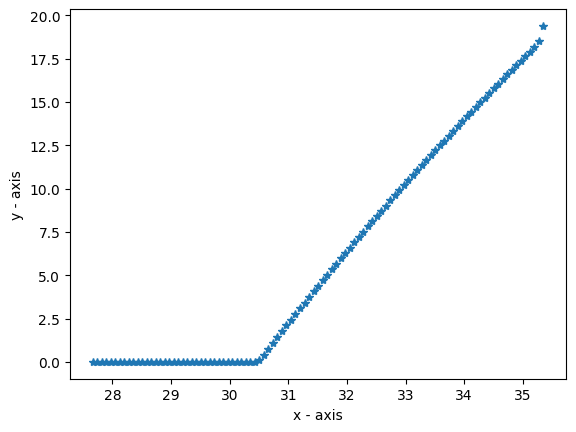

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

global sigma, r, K, T, xL, xH

def BSPut(s, tau, K):
    d1 = []
    d2 = []
    p = []
    for i in range(len(s)):
        d1.append((m.log(s[i] / K) + (r + sigma ** 2 / 2) * tau) / (sigma * m.sqrt(tau)))
    for i in range(len(s)):
        d2.append(d1[i] - sigma * m.sqrt(tau))
    for i in range(len(s)):
        p.append((-s[i] * m.erfc(d1[i] / m.sqrt(2)) + K * m.exp(-r * tau) * m.erfc(d2[i] / m.sqrt(2))) / 2)
    return p

def fh(u, x, tau, T):
    mu = (((sigma / 2) - (r / sigma)) / (m.sqrt(2)))
    nu = r + mu ** 2
    t = T - tau
    s = []
    v = []
    for i in range(len(x)):
        s.append(m.exp((sigma * x[i]) / m.sqrt(2)))
        v.append(m.exp(mu * x[i] - nu * tau) * (u))
    return s, v

def hf(v, s, t, T):
    mu = (((sigma / 2) - (r / sigma)) / (m.sqrt(2)))
    nu = r + mu ** 2
    tau = T - t
    x = []
    u = []
    if type(v) == list:
        for i in range(len(s)):
            x.append(m.sqrt(2) * m.log(s[i]) / sigma)
            u.append(v[i] / m.exp(mu * x[i] - nu * tau))
    else:
        for i in range(len(s)):
            x.append(m.sqrt(2) * m.log(s[i]) / sigma)
            u.append(v / m.exp(mu * x[i] - nu * tau))
    return x, u

def u0(x):
    s, trash = fh(0, x, 0, 0)
    v = vT(s)
    x, u = hf(v, s, 0, 0)
    return u

def uH(x, tau):
    s, v = fh(0, x, tau, tau)
    v = vH(s, 0, tau)
    x, u = hf(v, s, 0, tau)
    return u

def uL(x, tau):
    s, v = fh(0, x, tau, T)
    v = vL(s, 0, tau)
    x, u = hf(v, s, 0, tau)
    return u

def vH(s, t, T):
    v = 0
    return v

def vL(s, t, T):
    v = []
    for i in range(len(s)):
        v.append(K * m.exp(r * (T - t)) - s[i])
    return v

def vT(s):
    v_mod = []
    for i in range(len(s)):
        v_mod.append((K - s[i]))
    for i in range(len(v_mod)):
        if (v_mod[i] < 0):
            v_mod[i] = 0
    return v_mod

Stock_lower = 50
Stock_higher = 150
K = 100
sigma = 0.2
r = 0.01
T = 1

x, u = hf(0, [Stock_lower, Stock_higher], 0, 0)
xL = x[0]
xH = x[1]

N = 100
M = 1000
dx = (xH - xL) / (N + 1)
dt = T / M
alpha = dt / (dx) ** 2
x = np.linspace(xL, xH, N + 2)
u = []
u = u0(x[1:N])
print(u)
tau = 0

u1 = u[1:N]
u2 = u[0:N - 1]

for i in range(1, M):
    uH_value = alpha * uH([xH], tau)[0]
    uL_value = alpha * uL([xL], tau)[0]
    tau = i * dt

u_mod = []
u1_mod = []
u2_mod = []

for j in range(1, M):
    for i in range(len(u1)):
        if (0 < i < M):
            u[i] = u1[i] * alpha + u2[i] * alpha + (1 - (2 * alpha)) * u[i]

        elif (i == M):
            u[i] = uH([xH], tau)[0] + u2[i] * alpha + (1 - (2 * alpha)) * u[i]

u_master = []
for i in range(len(u)):
    u_master.append(u[i])

u_master.insert(0, uL([xL], T)[0])
u_master.append(uH([xH], T)[0])

s, trash = fh(0, x, 0, 0)
true_values = hf(BSPut(s, T, K), s, 0, T)

x_master = x[0:len(x) - 1]
u.append(0)
u.append(0)

# Reverse the order of x and u values for correct plotting
x_master = x[0:len(x) - 1]
u_master = u_master[::-1]

# Plot the correct graph
plt.plot(x_master, u_master, "*")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.show()
